In [1]:
import pandas as pd
import json

# Step 1: Read the JSON Lines file into a list of dictionaries
file_path = '../../data/train_data.json'
with open(file_path, 'r') as file:
    lines = file.readlines()
    data = [json.loads(line) for line in lines]

# Step 2: Iterate over the list to extract messages by role
system_messages = []
user_messages = []
assistant_messages = []

for item in data:
    system_msg = None
    user_msg = None
    assistant_msg = None
    
    for message in item['messages']:
        if message['role'] == 'system':
            system_msg = message['content']
        elif message['role'] == 'user':
            user_msg = message['content']
        elif message['role'] == 'assistant':
            assistant_msg = message['content']
            
    system_messages.append(system_msg)
    user_messages.append(user_msg)
    assistant_messages.append(assistant_msg)

# Step 3: Construct a DataFrame from the lists
df = pd.DataFrame({
    'System': system_messages,
    'User': user_messages,
    'Assistant': assistant_messages
})

# Show the DataFrame to verify its structure
print(df.head())

df = df[df.applymap(lambda x: isinstance(x, str)).all(axis=1)]

import tiktoken


# To get the tokeniser corresponding to a specific model in the OpenAI API:
enc = tiktoken.encoding_for_model("gpt-4")

df["Assistant_token_length"] = df["Assistant"].apply(lambda x: len(enc.encode(x)))
df.to_csv('../../data/train.csv', index=False)


                                              System  \
0  Du bist JurAI und ein deutscher Rechtsexperte,...   
1  Du bist JurAI und ein deutscher Rechtsexperte,...   
2  Du bist JurAI und ein deutscher Rechtsexperte,...   
3  Du bist JurAI und ein deutscher Rechtsexperte,...   
4  Du bist JurAI und ein deutscher Rechtsexperte,...   

                       User                                          Assistant  
0   Was steht in § 481 BGB?  § 481  Teilzeit-Wohnrechtevertrag\n(1) Ein Tei...  
1  Was steht in § 323b ZPO?  § 323b  Verschärfte Haftung\nDie Rechtshängigk...  
2  Was steht in § 1054 BGB?  § 1054  Gerichtliche Verwaltung wegen Pflichtv...  
3   Was steht in § 771 ZPO?  § 771  Drittwiderspruchsklage\n(1) Behauptet e...  
4    Was steht in § 92 BGB?  § 92 Verbrauchbare Sachen\n(1) Verbrauchbare S...  


/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_5654/1213618071.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[df.applymap(lambda x: isinstance(x, str)).all(axis=1)]


In [10]:
len(data)

29456

In [7]:
data[0]['messages'][2]["content"]

{'role': 'assistant',
 'content': '§ 481 \xa0Teilzeit-Wohnrechtevertrag\n(1) Ein Teilzeit-Wohnrechtevertrag ist ein Vertrag, durch den ein Unternehmer einem Verbraucher gegen\nZahlung eines Gesamtpreises das Recht verschafft oder zu verschaffen verspricht, für die Dauer von\nmehr als einem Jahr ein Wohngebäude mehrfach für einen bestimmten oder zu bestimmenden Zeitraum\nzu Übernachtungszwecken zu nutzen. Bei der Berechnung der Vertragsdauer sind sämtliche im Vertrag\nvorgesehenen Verlängerungsmöglichkeiten zu berücksichtigen.\n(2) Das Recht kann ein dingliches oder anderes Recht sein und insbesondere auch durch eine Mitgliedschaft in\neinem Verein oder einen Anteil an einer Gesellschaft eingeräumt werden. Das Recht kann auch darin bestehen,\naus einem Bestand von Wohngebäuden ein Wohngebäude zur Nutzung zu wählen.\n(3) Einem Wohngebäude steht ein Teil eines Wohngebäudes gleich, ebenso eine bewegliche, als\nÜbernachtungsunterkunft gedachte Sache oder ein Teil derselben.'}

In [15]:
import pandas as pd
df = pd.read_csv('../../data/train.csv')
df.dropna(inplace=True)

In [16]:
df


,System,User,Assistant,Assistant_token_length
0,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 481 BGB?,§ 481 Teilzeit-Wohnrechtevertrag\n(1) Ein Tei...,270
1,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 323b ZPO?,§ 323b Verschärfte Haftung\nDie Rechtshängigk...,81
2,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 1054 BGB?,§ 1054 Gerichtliche Verwaltung wegen Pflichtv...,95
3,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 771 ZPO?,§ 771 Drittwiderspruchsklage\n(1) Behauptet e...,227
4,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 92 BGB?,§ 92 Verbrauchbare Sachen\n(1) Verbrauchbare S...,122
...,...,...,...,...
29417,"Du bist JurAI und ein deutscher Rechtsexperte,...",Worum geht es in der Entscheidung?\nGericht:LG...,Gericht:LG Stuttgart 53. Zivil­kammer Entsch...,36197
29418,"Du bist JurAI und ein deutscher Rechtsexperte,...",Worum geht es in der Entscheidung?\nGericht:FG...,Gericht:FG Köln 7. Senat Entschei­dungs­datu...,9573
29419,"Du bist JurAI und ein deutscher Rechtsexperte,...",Worum geht es in der Entscheidung?\nGericht:OL...,Gericht:OLG München Senat für Famili­en­sach...,3274
29420,"Du bist JurAI und ein deutscher Rechtsexperte,...",Worum geht es in der Entscheidung?\nGericht:OL...,Gericht:OLG Celle 7. Zivil­senat Entschei­du...,9261


In [19]:
df[df.User.str.contains('Art') | df.User.str.contains('§')]#.to_csv('../../data/train_laws.csv', index=False)

,System,User,Assistant,Assistant_token_length
0,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 481 BGB?,§ 481 Teilzeit-Wohnrechtevertrag\n(1) Ein Tei...,270
1,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 323b ZPO?,§ 323b Verschärfte Haftung\nDie Rechtshängigk...,81
2,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 1054 BGB?,§ 1054 Gerichtliche Verwaltung wegen Pflichtv...,95
3,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 771 ZPO?,§ 771 Drittwiderspruchsklage\n(1) Behauptet e...,227
4,"Du bist JurAI und ein deutscher Rechtsexperte,...",Was steht in § 92 BGB?,§ 92 Verbrauchbare Sachen\n(1) Verbrauchbare S...,122
...,...,...,...,...
12922,"Du bist JurAI und ein deutscher Rechtsexperte,...",Worum geht es in der Entscheidung?\nGericht:LG...,Gericht:LG Berlin 103. Kammer für Handelssac...,6181
13036,"Du bist JurAI und ein deutscher Rechtsexperte,...",Worum geht es in der Entscheidung?\nGericht:BG...,Gericht:BGH 6. Zivil­senat Entschei­dungsnam...,13698
15799,"Du bist JurAI und ein deutscher Rechtsexperte,...",Worum geht es in der Entscheidung?\nGericht:AG...,Gericht:AG AhrensburgEntschei­dungs­datum:06.0...,16141
22122,"Du bist JurAI und ein deutscher Rechtsexperte,...",Worum geht es in der Entscheidung?\nGericht:AG...,Gericht:AG AhausEntschei­dungs­datum:30.03.202...,3109


In [20]:



text1 = 'Was steht in Art. 1 GG?'
text2 = 'Was steht in Art. 1 GG?Art 1 (1) Die Würde des Menschen ist unantastbar. Sie zu achten und zu schützen ist Verpflichtung aller staatlichen Gewalt. (2) Das Deutsche Volk bekennt sich darum zu unverletzlichen und unveräußerlichen Menschenrechten als Grundlage jeder menschlichen Gemeinschaft, des Friedens und der Gerechtigkeit in der Welt. (3) Die nachfolgenden Grundrechte binden Gesetzgebung, vollziehende Gewalt und Rechtsprechung als unmittelbar geltendes Recht.'
text3 = 'Was steht in Art. 41 GG?Art 41 (1) Die Wahlprüfung ist Sache des Bundestages. Er entscheidet auch, ob ein Abgeordneter des Bundestages die Mitgliedschaft verloren hat. (2) Gegen die Entscheidung des Bundestages ist die Beschwerde an das Bundesverfassungsgericht zulässig. (3) Das Nähere regelt ein Bundesgesetz.'
emb1 = embedding.embed_query(text1)
emb2 = embedding.embed_query(text2)
emb3 = embedding.embed_query(text3)



# Calculate the cosine similarities
cos_sim_1_2 = cosine_similarity(emb1, emb2)
cos_sim_1_3 = cosine_similarity(emb1, emb3)
cos_sim_2_3 = cosine_similarity(emb2, emb3)

print(f'''
Cosine Similarity 1 -> 2: {cos_sim_1_2:.2f}
Cosine Similarity 1 -> 3: {cos_sim_1_3:.2f}
Cosine Similarity 2 -> 3: {cos_sim_2_3:.2f}
''')


# Calculate the cosine distances based on the previously calculated similarities
cos_dist_1_2 = 1 - cos_sim_1_2
cos_dist_1_3 = 1 - cos_sim_1_3
cos_dist_2_3 = 1 - cos_sim_2_3

print(f'''
Cosine Distance 1 -> 2: {cos_dist_1_2:.2f}
Cosine Distance 1 -> 3: {cos_dist_1_3:.2f}
Cosine Distance 2 -> 3: {cos_dist_2_3:.2f}
''')


Cosine Similarity 1 -> 2: 0.78
Cosine Similarity 1 -> 3: 0.62
Cosine Similarity 2 -> 3: 0.55


Cosine Distance 1 -> 2: 0.22
Cosine Distance 1 -> 3: 0.38
Cosine Distance 2 -> 3: 0.45



In [24]:
from langchain.embeddings.openai import OpenAIEmbeddings
import numpy as np
embedding = OpenAIEmbeddings()
from numpy.linalg import norm

# Calculating cosine similarity
def cosine_similarity(A, B):
    return np.dot(A, B) / (norm(A) * norm(B))

texts = [
    'Was steht in Art. 1 GG?', #1
    "Art 115c (1) Der Bund hat für den Verteidigungsfall das Recht der konkurrierenden Gesetzgebung auch auf den Sachgebieten, die zur Gesetzgebungszuständigkeit der Länder gehören. Diese Gesetze bedürfen der Zustimmung des Bundesrates. (2) Soweit es die Verhältnisse während des Verteidigungsfalles erfordern, kann durch Bundesgesetz für den Verteidigungsfall 1. bei Enteignungen abweichend von Artikel 14 Abs. 3 Satz 2 die Entschädigung vorläufig geregelt werden, 2. für Freiheitsentziehungen eine von Artikel 104 Abs. 2 Satz 3 und Abs. 3 Satz 1 abweichende Frist, höchstens jedoch eine solche von vier Tagen, für den Fall festgesetzt werden, daß ein Richter nicht innerhalb der für Normalzeiten geltenden Frist tätig werden konnte", #2
    "Art 1 (1) Die Würde des Menschen ist unantastbar. Sie zu achten und zu schützen ist Verpflichtung aller staatlichen Gewalt. (2) Das Deutsche Volk bekennt sich darum zu unverletzlichen und unveräußerlichen Menschenrechten als Grundlage jeder menschlichen Gemeinschaft, des Friedens und der Gerechtigkeit in der Welt. (3) Die nachfolgenden Grundrechte binden Gesetzgebung, vollziehende Gewalt und Rechtsprechung als unmittelbar geltendes Recht.",#3
    "Ein Verstoß gegen das von Art. 2 Abs. 1 i.V.m. Art. 1 Abs. 1 GG geschützte Recht am eigenen Wort liegt insbesondere vor, wenn ein Zeuge heimlich Gespräche mithört (sog. Lauschzeuge) oder aber die Worte heimlich aufgezeichnet werden. Denn das Recht am eigenen Wort umfasst insbesondere auch selbst zu bestimmen, wen das Wort erreichen soll und wo es verkörpert wird. Mithin ist die Verwertung grds. unzulässig. Eine Ausnahme wird nur dann anerkannt, wenn sich der Beweispflichtige in einer notwehrähnlichen Situation befunden hat oder Aufgezeichnete oder Belauschte in die Praktik eingewilligt hat; auch eine mutmaßliche Einwilligung ist zulässig",#4
    "Art 141 Artikel 7 Abs. 3 Satz 1 findet keine Anwendung in einem Lande, in dem am 1. Januar 1949 eine andere landesrechtliche Regelung bestand.", #5
    "§ 71 Abs. 2: Änd. durch G v. 26.6.1981 I 553 gem. BVerfGE v. 19.10.1982 I 1493 mit Art. 70 GG unvereinbar und daher nichtig" #6
]

embeddings = [embedding.embed_query(text) for text in texts]

# Assuming the first text is your query
query_embedding = embeddings[0]

# Calculate and print cosine similarities and distances with the query
for i, emb in enumerate(embeddings[1:], start=2):
    cos_sim = cosine_similarity(query_embedding, emb)
    cos_dist = 1 - cos_sim
    print(f'Cosine Similarity 1 -> {i}: {cos_sim:.4f}', f'Cosine Distance 1 -> {i}: {cos_dist:.4f}')


Cosine Similarity 1 -> 2: 0.8519 Cosine Distance 1 -> 2: 0.1481
Cosine Similarity 1 -> 3: 0.8482 Cosine Distance 1 -> 3: 0.1518
Cosine Similarity 1 -> 4: 0.8351 Cosine Distance 1 -> 4: 0.1649
Cosine Similarity 1 -> 5: 0.8355 Cosine Distance 1 -> 5: 0.1645
Cosine Similarity 1 -> 6: 0.8333 Cosine Distance 1 -> 6: 0.1667


In [21]:
len(embeddings)

3

In [21]:
df = df[df['User'].notna() & df['User'].str.contains("§")]

In [25]:
{
  "query": "Was steht in Art. 1 GG?",
  "result": "Artikel 1 des Grundgesetzes (GG) für die Bundesrepublik Deutschland lautet wie folgt:\n\n(1) Die Würde des Menschen ist unantastbar. Sie zu achten und zu schützen ist Verpflichtung aller staatlichen Gewalt.\n(2) Das Deutsche Volk bekennt sich darum zu unverletzlichen und unveräußerlichen Menschenrechten als Grundlage jeder menschlichen Gemeinschaft, des Friedens und der Gerechtigkeit in der Welt.\n(3) Die nachfolgenden Grundrechte binden Gesetzgebung, vollziehende Gewalt und Rechtsprechung als unmittelbar geltendes Recht.\n\nDieser Artikel ist der erste und grundlegendste Artikel des Grundgesetzes und legt die Basis für alle weiteren Gesetze und Verordnungen in Deutschland. Er stellt die Würde des Menschen und die unverletzlichen und unveräußerlichen Menschenrechte in den Mittelpunkt und bindet alle staatlichen Gewalten an diese Grundsätze.",
  "source_documents": [
    {
      "page_content": "Art 115c (1) Der Bund hat für den Verteidigungsfall das Recht der konkurrierenden Gesetzgebung auch auf den Sachgebieten, die zur Gesetzgebungszuständigkeit der Länder gehören. Diese Gesetze bedürfen der Zustimmung des Bundesrates. (2) Soweit es die Verhältnisse während des Verteidigungsfalles erfordern, kann durch Bundesgesetz für den Verteidigungsfall 1. bei Enteignungen abweichend von Artikel 14 Abs. 3 Satz 2 die Entschädigung vorläufig geregelt werden, 2. für Freiheitsentziehungen eine von Artikel 104 Abs. 2 Satz 3 und Abs. 3 Satz 1 abweichende Frist, höchstens jedoch eine solche von vier Tagen, für den Fall festgesetzt werden, daß ein Richter nicht innerhalb der für Normalzeiten geltenden Frist tätig werden konnte"
    },
    {
      "page_content": "Art 1 (1) Die Würde des Menschen ist unantastbar. Sie zu achten und zu schützen ist Verpflichtung aller staatlichen Gewalt. (2) Das Deutsche Volk bekennt sich darum zu unverletzlichen und unveräußerlichen Menschenrechten als Grundlage jeder menschlichen Gemeinschaft, des Friedens und der Gerechtigkeit in der Welt. (3) Die nachfolgenden Grundrechte binden Gesetzgebung, vollziehende Gewalt und Rechtsprechung als unmittelbar geltendes Recht."
    },
    {
      "page_content": "Ein Verstoß gegen das von Art. 2 Abs. 1 i.V.m. Art. 1 Abs. 1 GG geschützte Recht am eigenen Wort liegt insbesondere vor, wenn ein Zeuge heimlich Gespräche mithört (sog. Lauschzeuge) oder aber die Worte heimlich aufgezeichnet werden. Denn das Recht am eigenen Wort umfasst insbesondere auch selbst zu bestimmen, wen das Wort erreichen soll und wo es verkörpert wird. Mithin ist die Verwertung grds. unzulässig. Eine Ausnahme wird nur dann anerkannt, wenn sich der Beweispflichtige in einer notwehrähnlichen Situation befunden hat oder Aufgezeichnete oder Belauschte in die Praktik eingewilligt hat; auch eine mutmaßliche Einwilligung ist zulässig"
    },
    {
      "page_content": "Art 141 Artikel 7 Abs. 3 Satz 1 findet keine Anwendung in einem Lande, in dem am 1. Januar 1949 eine andere landesrechtliche Regelung bestand."
    },
    {
      "page_content": "§ 71 Abs. 2: Änd. durch G v. 26.6.1981 I 553 gem. BVerfGE v. 19.10.1982 I 1493 mit Art. 70 GG unvereinbar und daher nichtig"
    }
  ]
}


(4201, 4)

In [23]:
df.to_csv('../../data/train_gg.csv', index=False)

In [11]:
#how much data smaller than 1024 tokens
print(df[df["Assistant_token_length"] < 8094].shape[0] / df.shape[0])

0.994525113068317


In [12]:
df["Assistant_token_length"].sum()*0.02/1000000 #$0.02 / 1M tokens

0.02766936

In [14]:
df["Assistant_token_length"].mean() #mean token length

329.31873363484885

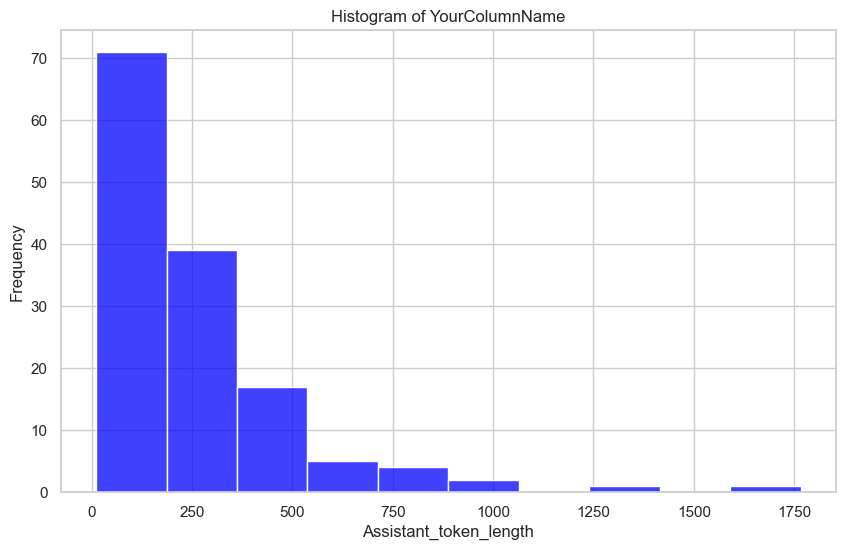

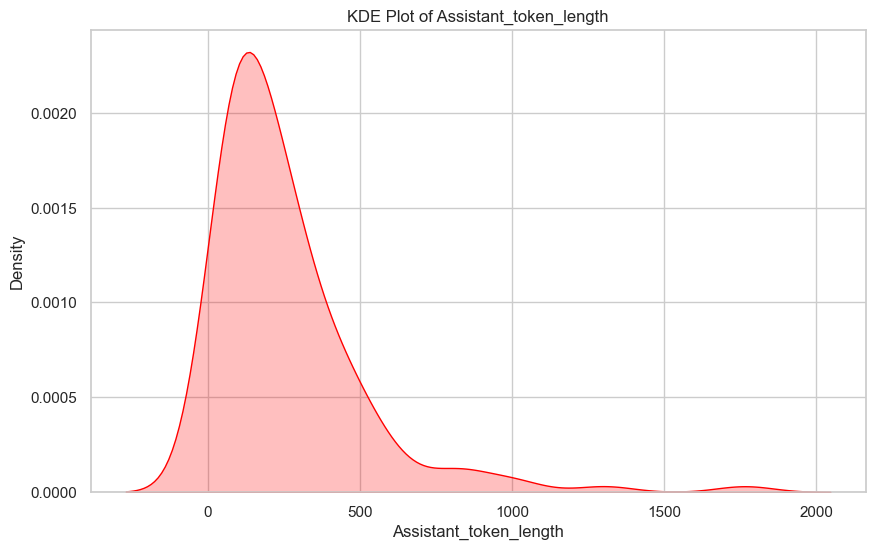

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the numerical column
sns.set(style="whitegrid")  # Set the aesthetic style of the plots

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Assistant_token_length'], kde=False, color="blue", bins=10)
plt.title('Histogram of YourColumnName')
plt.xlabel('Assistant_token_length')
plt.ylabel('Frequency')
plt.show()

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Assistant_token_length'], color="red", fill=True)
plt.title('KDE Plot of Assistant_token_length')
plt.xlabel('Assistant_token_length')
plt.ylabel('Density')
plt.show()